# Notebook-1 : Introduction to Qiskit Fundamentals

Hello everyone, welcome to 2025 edition Qiskit Fall Fest at IISER, Kolkata. We begin with this notebook which will equip you with the knowldge of basic functionalities of qiskit. Hope you have a fun time solving these exercizes.

In [3]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter, ParameterVector
import qiskit.qasm3
from qiskit_ibm_runtime.fake_provider import FakeVigoV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator, QiskitRuntimeService


# Exercize - 1 : Creating Pauli Operators in Qiskit

Write the code to create the following pauli opeartors - **XXX, IYY, ZIZ, XYX**. Remember the right most operator acts on the first qubit of your quantum circuit.

In [16]:
#XXX
pauli_op = Pauli('XXX')

print(pauli_op)
print(pauli_op.to_matrix())

#IYY




#ZIZ




#XYX





XXX
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


# Exercize - 2 : Creating Your First Quantum Circuit

**Exercise 2:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains one qubit.
2. Puts the qubit in the state |1⟩.
3. Apply the hadamard gate on the above state and create a superpostion state
4. run the quantum circuit using a quantum simulator and check your results 

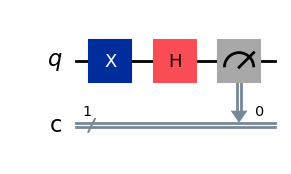

In [ ]:
#qc = 


#qc.measure(0,0)
#qc.draw("mpl")



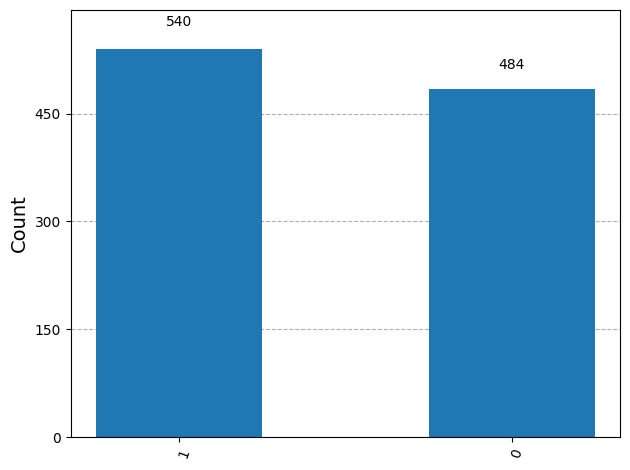

In [9]:
backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=1024)
result = job.result()
counts = result[0].data.c.get_counts()

plot_histogram(counts, sort='value_desc')

# Exercize - 3 : Creating multi-qubit Quantum Circuits

**Exercise 3:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains 3 qubits .
2. Puts the qubit in the state |000⟩.
3. Apply the hadamard gate on all the three qubits and cnot gate from (0,1) and (1,2) to create the 3-qubit ghz state |000> + |111> .
4. run the quantum circuit using a quantum simulator and check your results 

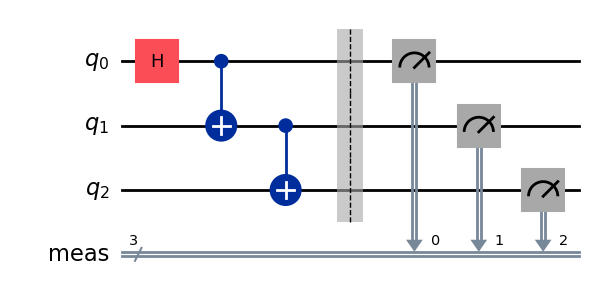

In [ ]:
#qc = QuantumCircuit()



Measurement counts: {'111': 2419, '000': 2581}


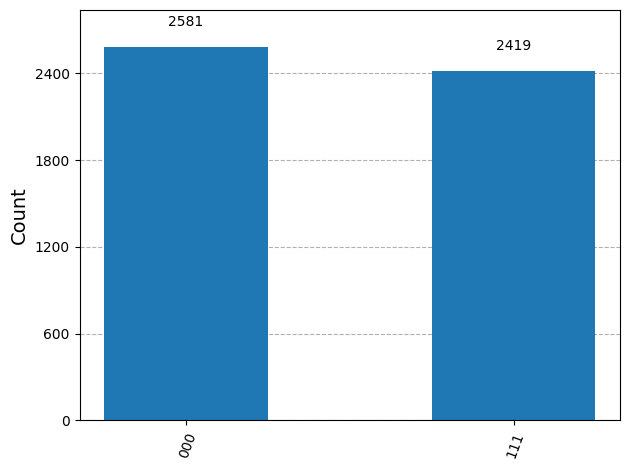

In [15]:
backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_bell = pm.run(qc)

sampler = Sampler(mode=backend)

job = sampler.run([isa_bell], shots=5000)
result = job.result()

counts = result[0].data.meas.get_counts()
print(f'Measurement counts: {counts}')
plot_histogram(counts, sort='value_desc')

# Exercize - 4 : Implementing Rotation gates and Bloch Sphere Visualization

**Exercise 4:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains 3 qubits 
2. Apply a rotation around y-axis by an angle of pi/4 on 1st qubit
3. Apply a rotation around x-axis by an angle of 3*pi/4 on 2nd qubit
4. Apply a rotation around z-axis by an angle of pi/2 on 3rd qubit 
5. See the rotations of the Bloch sphere by the action of our rotation gates

Probabilities: {np.str_('000'): np.float64(0.12500000000000006), np.str_('001'): np.float64(0.02144660940672625), np.str_('010'): np.float64(0.7285533905932737), np.str_('011'): np.float64(0.12500000000000006)}


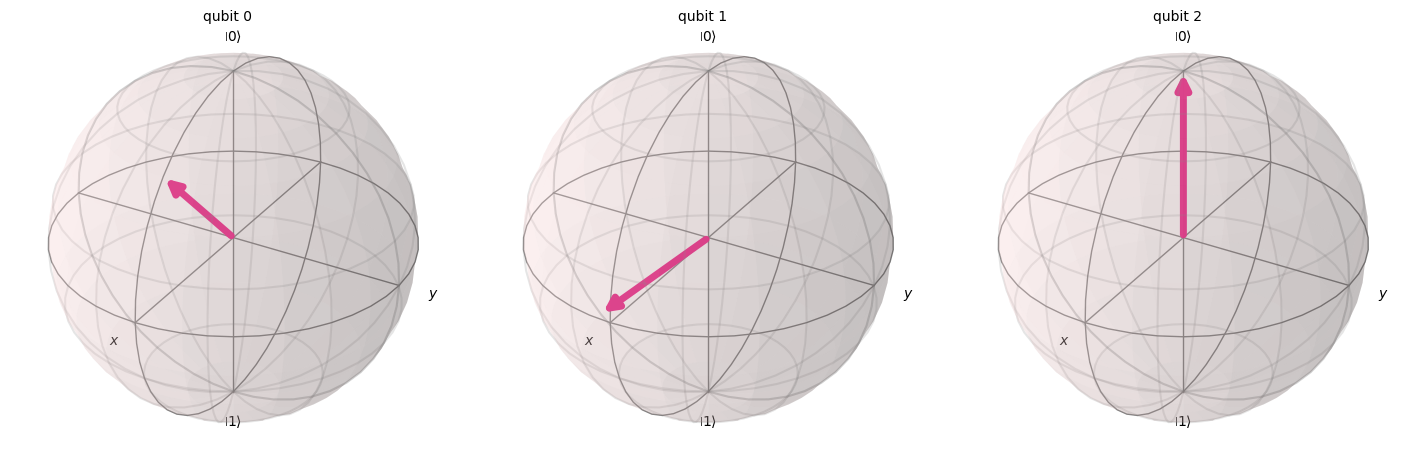

In [ ]:
#write your code here




#Vizualization of final statevector
sv = Statevector(qc)
probs = sv.probabilities_dict()
print(f'Probabilities: {probs}')
plot_bloch_multivector(sv)

# Exercize - 5 : Parametrized Quantum Circuits

**Exercise 5:**
Write code that performs following functionality:
1. Creates a `Parameter` instance to represent a parameter named `theta`.
2. Creates a quantum circuit `qc` that contains one qubit.
3. Adds an RX gate with parameter `theta` to the qubit wire.
4. Draws the `qc` circuit.
5. Creates a new circuit `bound_qc` by binding the parameter `theta` to the value `π/2`.
6. Draws the `bound_qc` circuit.

Original Unbound Circuit:


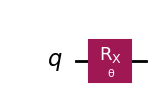

New Bound Circuit:


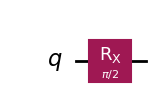

In [ ]:
#write your code here

# Exercize - 6 : Calculating expectation values of observables in Qiskit

**Exercise 6:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains the |Φ+⟩ Bell state i.e |00> + |11> .
2. Defines the ZZ observable using `SparsePauliOp`
3. Transpiles the circuit using the `AerSimulator` backend.
4. Applies the observable to the circuit layout
5. Initializes the `Estimator` primitive with the `AerSimulator` backend.
6. Runs the Estimator.
4. Gets the PUB result.
5. Retrieves and prints the expectation value.

In [23]:
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)

observable = SparsePauliOp('ZZ')

backend = AerSimulator()
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_bell = pm.run(bell)

isa_observable = observable.apply_layout(isa_bell.layout)

estimator = Estimator(mode=backend)

job = estimator.run([(isa_bell, isa_observable)])
result = job.result()

pub_result = result[0]
exp_val = pub_result.data.evs
print(f'Expectation value for ZZ: {exp_val}')

Expectation value for ZZ: 1.0


# Congratulations ! You have learnt the basics of Quantum Computing using Qiskit.